In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")

In [4]:
print(data.shape)

(8950, 18)


In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

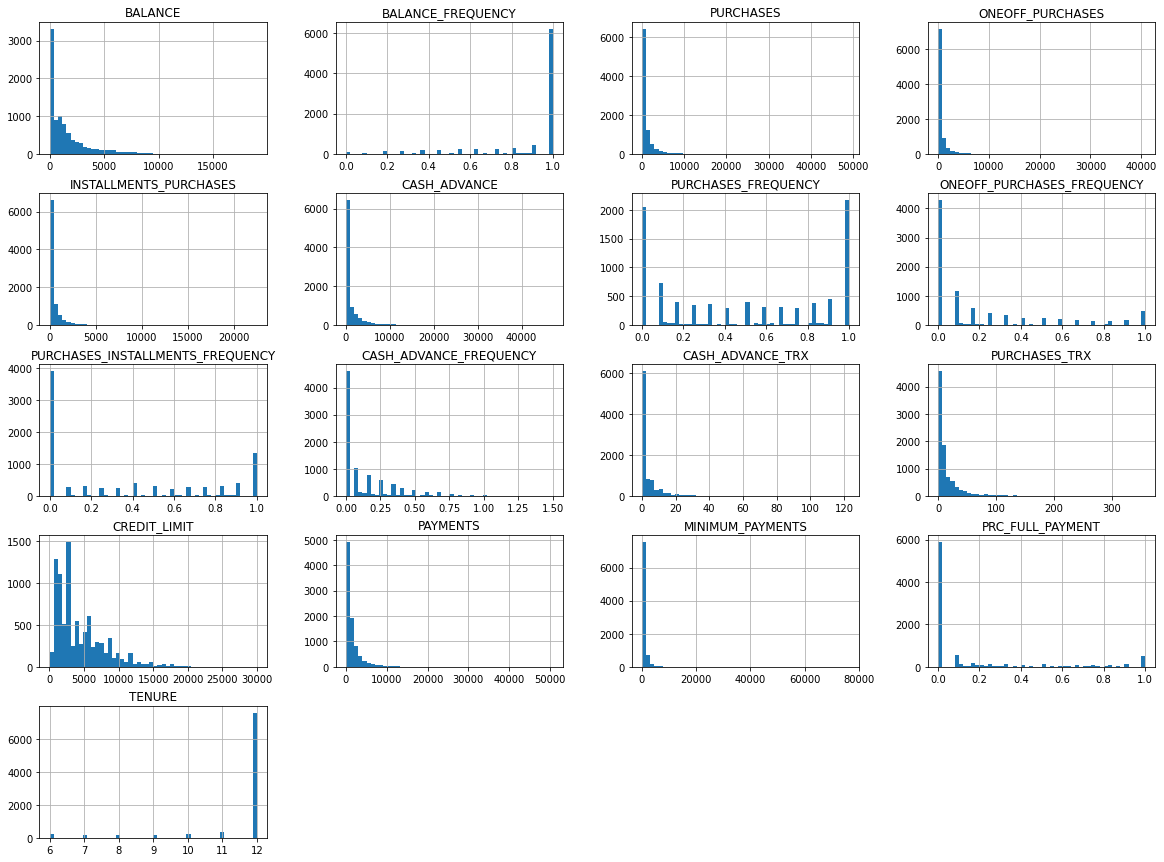

In [8]:
data.hist(bins=50,figsize=(20,15))

In [9]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [10]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [11]:
data.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [12]:
data.drop('CUST_ID',axis=1,inplace=True)

In [13]:
data.shape

(8950, 17)

<AxesSubplot:>

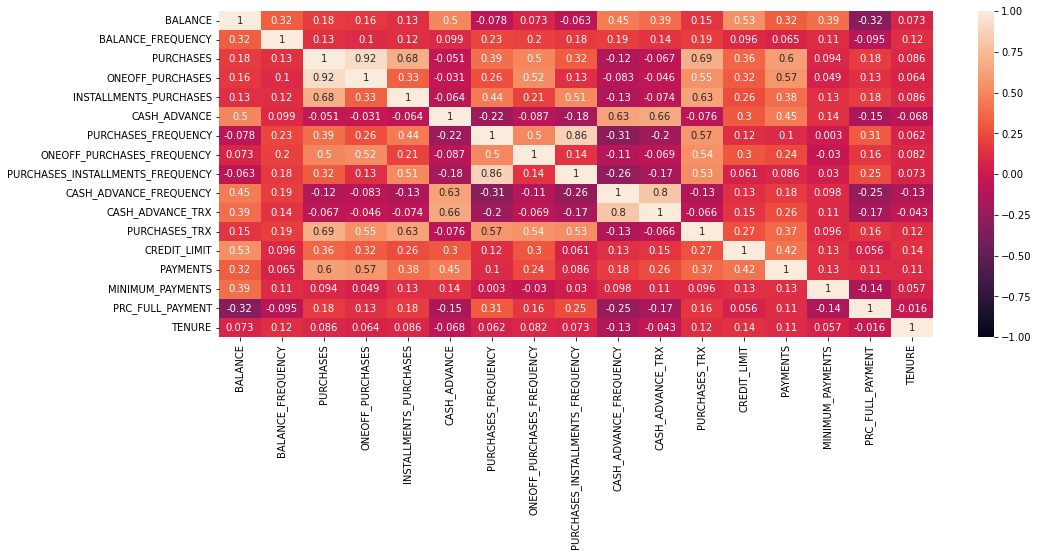

In [14]:
plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = data.corr(), vmin = -1, vmax = 1, annot = True)

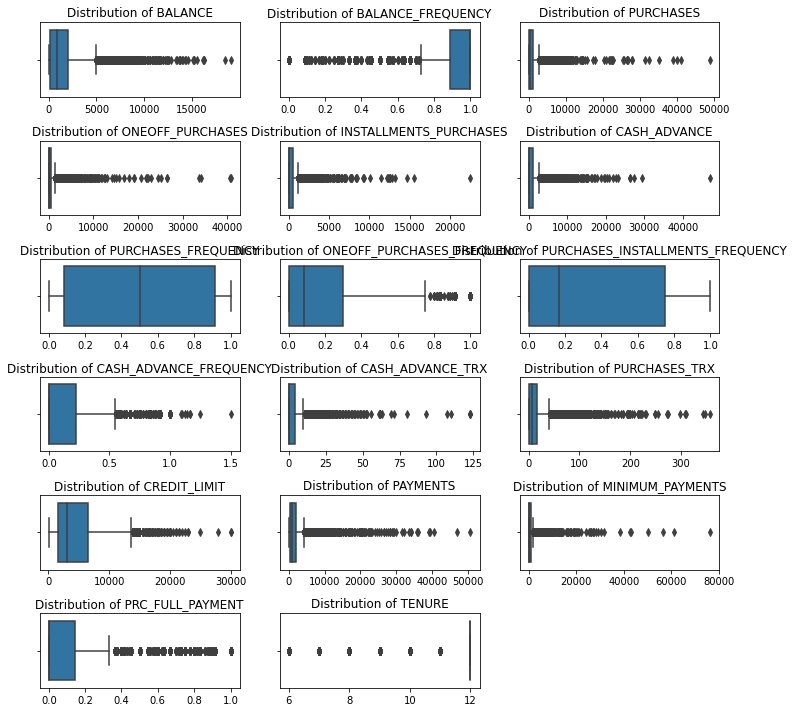

In [15]:
fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(data.columns, 1): 
    ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = data, x=data[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X = scale.fit_transform(data)
X.shape

(8950, 17)

In [17]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(X)
model.predict(X)

array([ 1,  1,  1, ...,  1,  1, -1])

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = pt.fit_transform(X)

# BIRCH

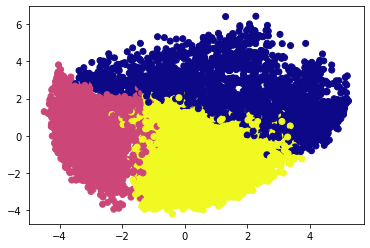

In [19]:
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import Birch
pca = IncrementalPCA(n_components = 3)
X_pca = pca.fit_transform(X)

model = Birch(threshold=0.01, n_clusters=3)
model.fit(X_pca)
yhat = model.predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

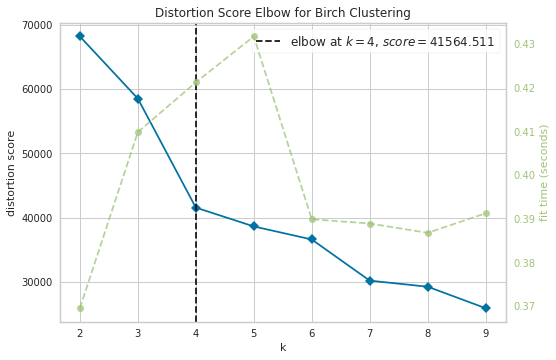

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = Birch()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

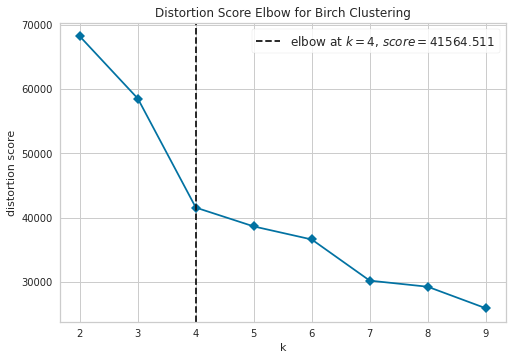

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Instantiate the clustering model and visualizer
model = Birch()
visualizer = KElbowVisualizer(model, k=(2,10),timings=False)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

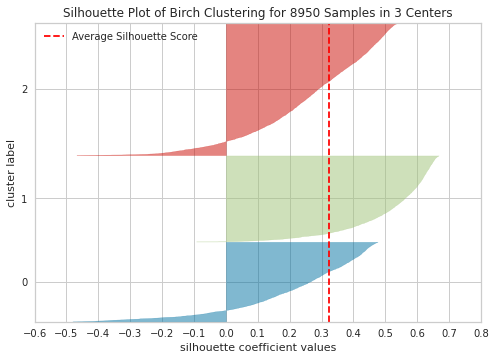

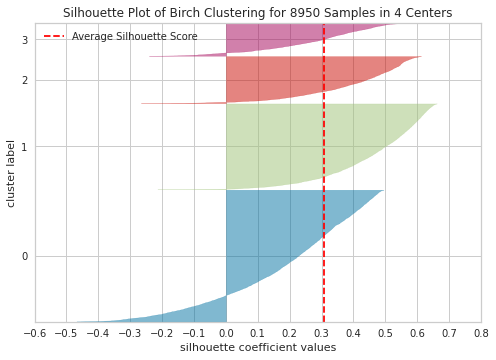

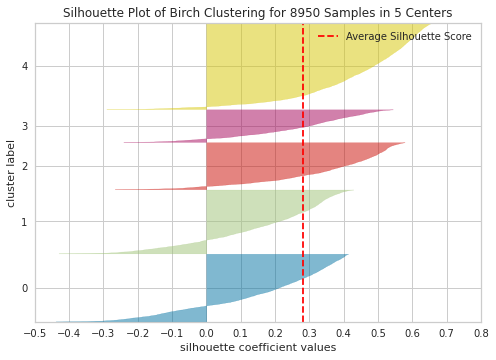

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range (3,6):
  model = Birch(threshold=0.01, n_clusters=i)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X_pca)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

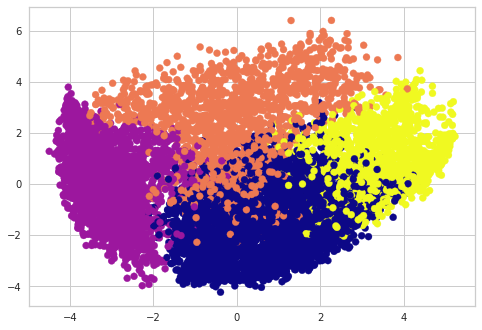

In [23]:
pca = IncrementalPCA(n_components = 4)
X_pca = pca.fit_transform(X)

model = Birch(threshold=0.01, n_clusters=4)
model.fit(X_pca)
yhat = model.predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

# KMeans

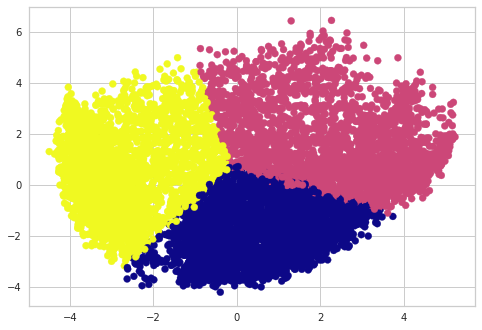

In [24]:
from sklearn.cluster import KMeans

pca = IncrementalPCA(n_components = 3)
X_pca = pca.fit_transform(X)

model = KMeans(n_clusters=3)
yhat = model.fit_predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

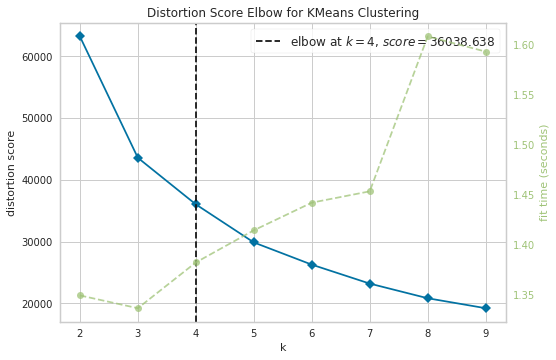

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


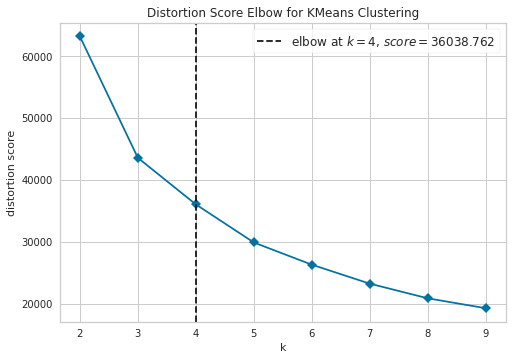

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10),  timings=False
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


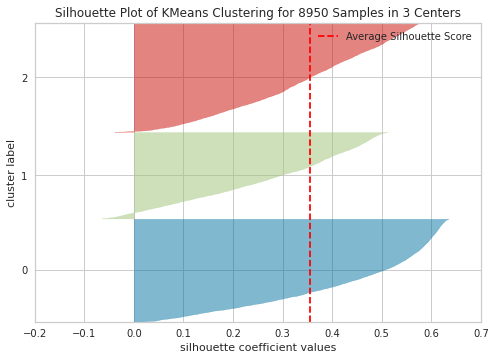

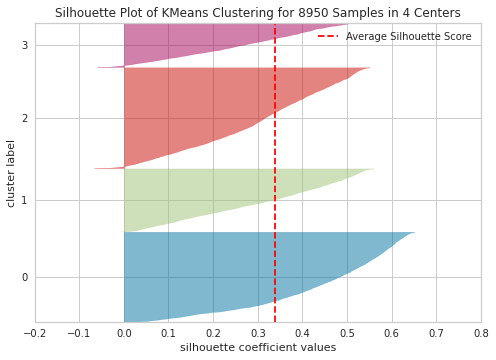

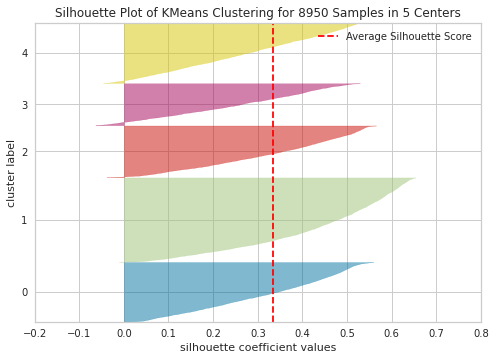

In [27]:
# Instantiate the clustering model and visualizer
for i in range (3,6):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X_pca)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

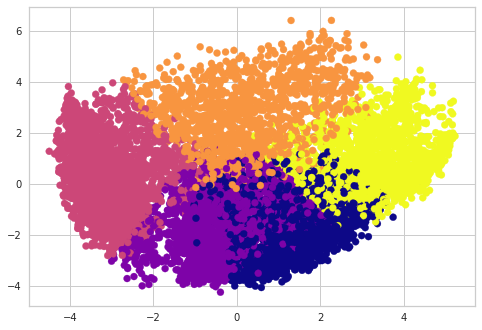

In [28]:
pca = IncrementalPCA(n_components = 5)
X_pca = pca.fit_transform(X)

model = KMeans(n_clusters=5)
yhat = model.fit_predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

# Mini-Batch K-Means

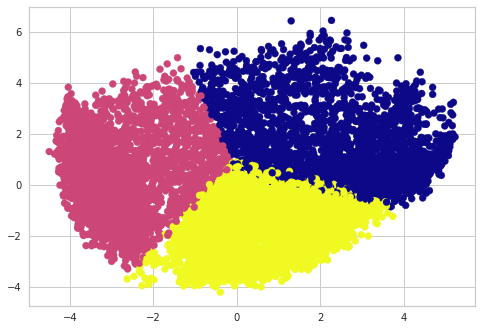

In [29]:
from sklearn.cluster import MiniBatchKMeans

pca = IncrementalPCA(n_components = 3)
X_pca = pca.fit_transform(X)

model = MiniBatchKMeans(n_clusters=3)
yhat = model.fit_predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

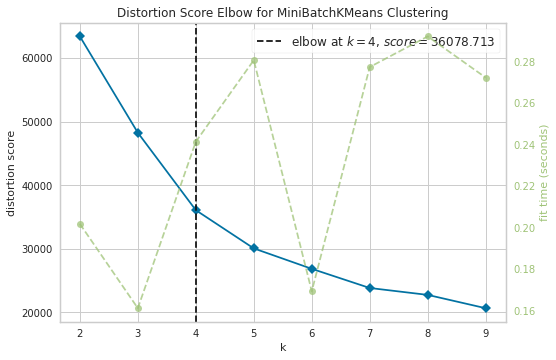

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10)
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


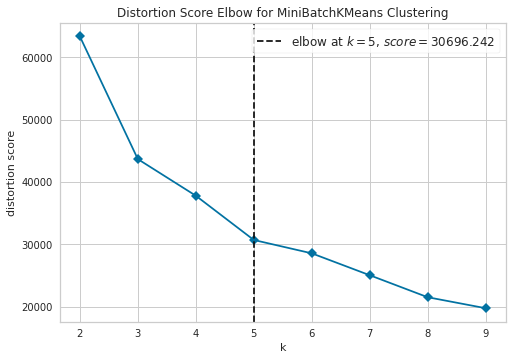

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10),  timings=False
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


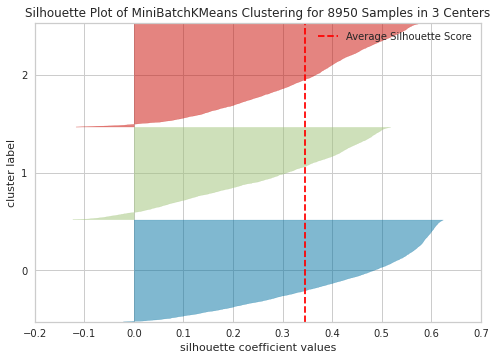

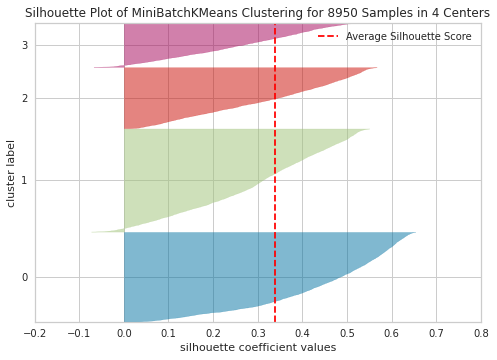

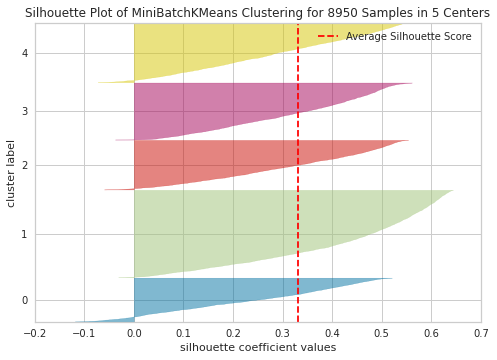

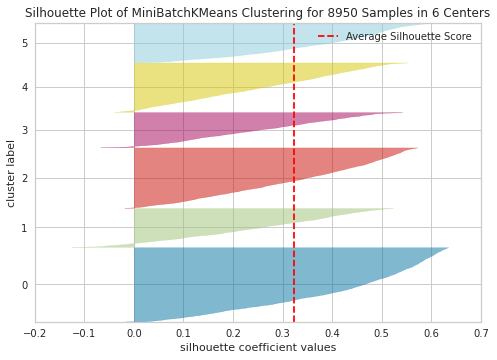

In [32]:
# Instantiate the clustering model and visualizer
for i in range (3,7):
  model = MiniBatchKMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X_pca)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

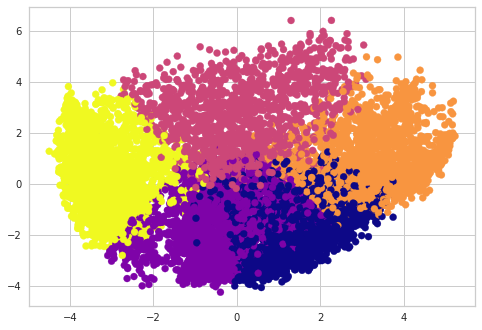

In [33]:
from sklearn.cluster import MiniBatchKMeans

pca = IncrementalPCA(n_components = 5)
X_pca = pca.fit_transform(X)

model = MiniBatchKMeans(n_clusters=5)
yhat = model.fit_predict(X_pca)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

# Spectral Clustering

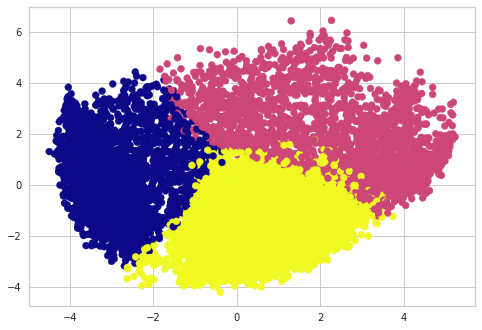

In [34]:
from sklearn.cluster import SpectralClustering

pca = IncrementalPCA(n_components = 3)
X_pca = pca.fit_transform(X)


model = SpectralClustering(n_clusters=3)
yhat = model.fit_predict(X_pca)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

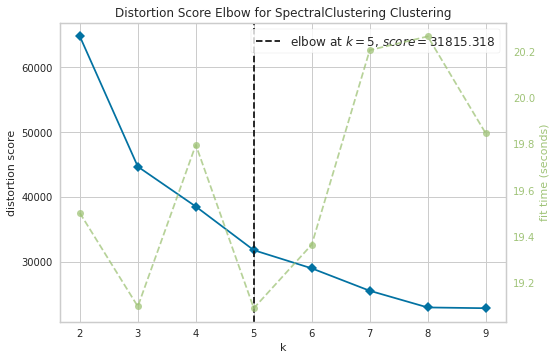

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = SpectralClustering()
visualizer = KElbowVisualizer(
    model, k=(2,10)
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


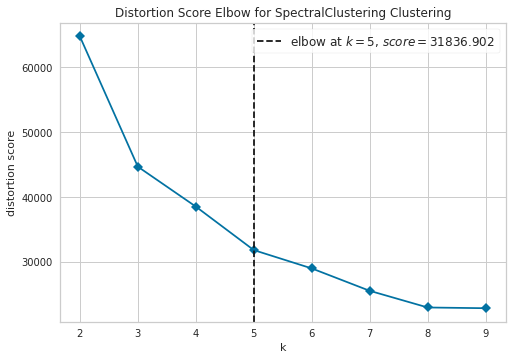

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = SpectralClustering()
visualizer = KElbowVisualizer(
    model, k=(2,10),  timings=False
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure


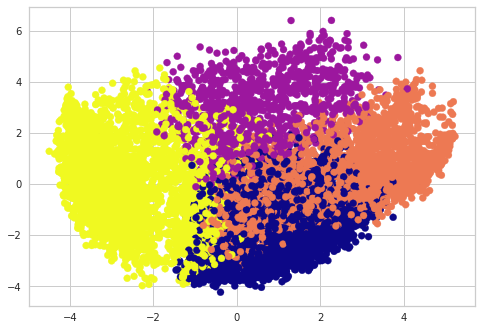

In [37]:
from sklearn.cluster import SpectralClustering

pca = IncrementalPCA(n_components = 4)
X_pca = pca.fit_transform(X)


model = SpectralClustering(n_clusters=4)
yhat = model.fit_predict(X_pca)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

number of clusters:  73


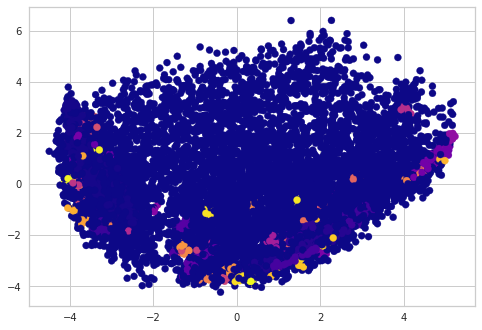

In [38]:
from sklearn.cluster import DBSCAN
pca = IncrementalPCA(n_components = 4)
X_pca = pca.fit_transform(X)


model = DBSCAN(eps=0.2,min_samples=5)
yhat = model.fit_predict(X_pca)
labels = model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters: ",n_clusters_)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()

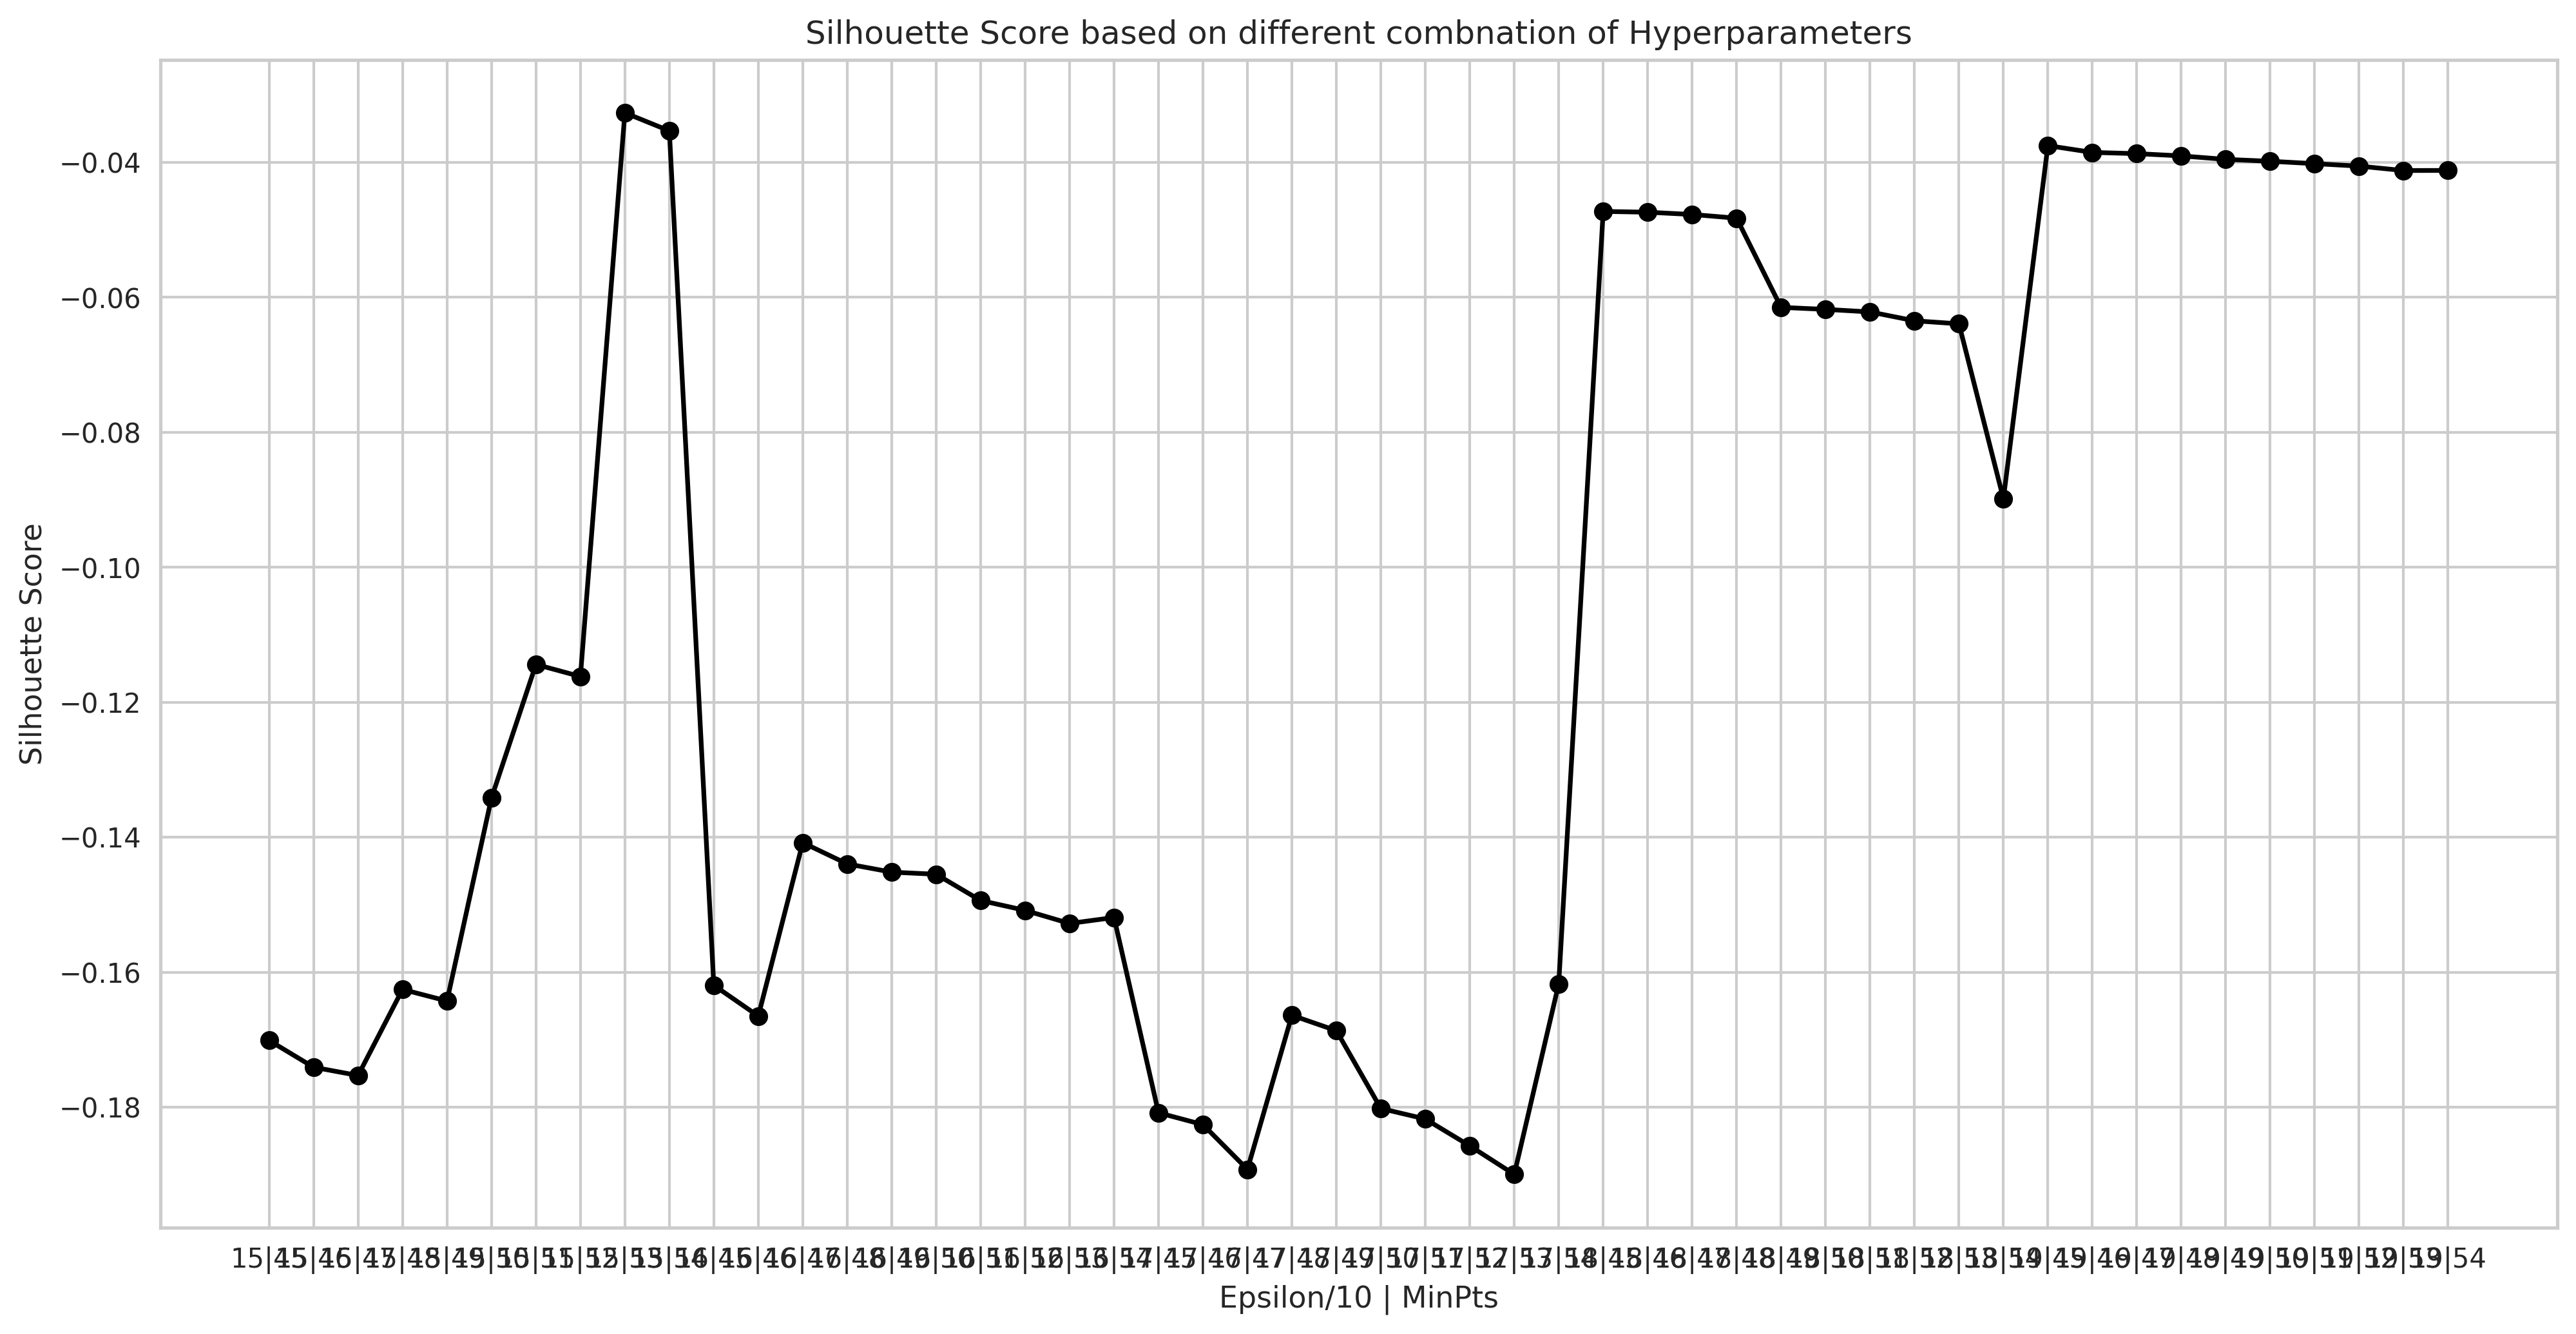

In [43]:
from sklearn import metrics
# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(15,20) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(45,55)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/10, min_samples=j)
        # Fit the model 
        clm = model.fit(X)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/10 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

number of clusters:  4


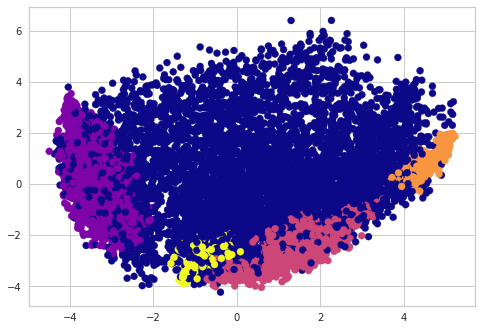

In [40]:
from sklearn.cluster import DBSCAN
pca = IncrementalPCA(n_components = 4)
X_pca = pca.fit_transform(X)


model = DBSCAN(eps=0.6,min_samples=50)
yhat = model.fit_predict(X_pca)
labels = model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters: ",n_clusters_)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = yhat, cmap = 'plasma')
plt.show()